# Explore Movie Data

## Dataset Summary

Making a movie with famous actors may require a budget of
tens of millions of dollars. This is a large investment that has to
be earned back through attracting enough paying visitors to cinemas.
If one could predict the return of investment of a movie and how long it will take to break even, then this
would be very useful for investors. In relation to this, it is worthwhile
investigating whether the success of a certain movie is influenced
by its genre, the month of release, and the actors that play in them. Your task
in this assignment will be to investigate several financial aspects
of movies. 

## Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn
from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

<div class="alert alert-info" role="alert" style="margin-bottom:-70px"><br/><br/></div>

# Section 1: Exploratory Data Analysis

<br/> A proper data analysis should always start with exploration of the
data. You will work with the dataset **movies.csv**, which
contains several financial and non-financial details of more than
2000 movies. See below for the names of the
**features** (a feature = a column) in this dataset.

## Codebook of the <font color="red">movies</font> dataset
A record = one movie, with details about release date, actors, language, genre etc.

|Field  | Type | Description | 
|:-------|:----|:----|
|Movie ID|string|Unique ID for the Movie |
|Movie Title|string|Title of the Movie | 
|Release Year|int|Year the movie was released |
|Release Month|int|Month the movie was released |
|Production Budget|int|in \$ | 
|Worldwide Gross|int|movie income worldwide, in \$ |
|Genre|string|'Action', 'Adventure', 'Western', 'Drama' etc. |
|Duration|int|Duration in minutes |
|Number Critic Reviews|int|Number of critical reviews on imdb |
|Actor 1 Facebook Likes|int|Number of likes of the main actor on his/her Facebook Page |
|Number Voted Users|int| Number of users who voted for the movie's IMDb score|
|IMDb Score|int|Score of the movie on IMDb | 
|Weeks Running|int| Number of weeks the movie ran domestically|
|First Week Gross|int| How much money the movie made (domestically) in the first week (in $)|
|Theaters in First Week|int| How many theaters displayed the movie on its first week (domestic)|
|Theaters in Second Week|int| How many theaters displayed the movie on its second week (domestic)|
|Theaters in Last Week|int|How many theaters displayed the movie on its last week (domestic)|
|Max Theaters|int|Maximum number of theaters that simultaneously displayed the movie (domestic)|


<div class="alert alert-info" role="alert" style="height:10px;padding:0px;margin-bottom:-20px"></div>

### Exploring Profit and Return on Investment (ROI)

<div class="alert alert-info" role="alert" style="height:10px;padding:0px;margin-top:5px;"></div>

The data contains for each movie its **Production Budget** and **Worldwide Gross**. Investors, however, are usually also interested in the profit. Let us use the features **Production Budget** and **Worldwide Gross** to construct two new features `'Profit'` (i.e. **Worldwide Gross** minus **Production Budget**) and `'ROI'` (i.e. **Profit** divided by **Production Budget**).

In [2]:
sns.set(rc={'figure.figsize':(15,5)})
df_movies = pd.read_csv('data/movies.csv')
df_movies['Profit'] = df_movies['Worldwide Gross'] - df_movies['Production Budget']
df_movies['ROI'] =  df_movies['Profit']/df_movies['Production Budget']

**2.** Lets explore the distribution of the **Profit** and the **ROI**.

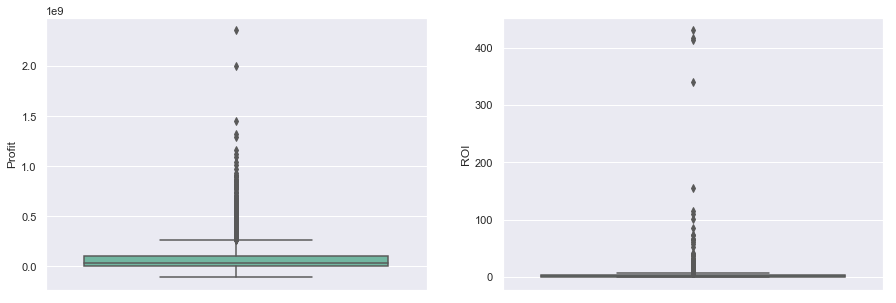

In [3]:
fig, axes= plt.subplots(1,2)
sns.boxplot(x=df_movies['Profit'],ax=axes[0],orient="v", palette="Set2")
sns.boxplot(x=df_movies['ROI'],ax=axes[1],orient="v", palette="Set2");

Wow! Those are lots of outliers.

In [4]:
# What are the 5 movies that made the largest profit?
df_movies.nlargest(5,'Profit')

,Movie ID,Movie Title,Release Year,Release Month,Production Budget,Worldwide Gross,Genre,Duration,Number Critic Reviews,Actor 1 Facebook Likes,Number Voted Users,IMDb Score,Weeks Running,First Week Gross,Theaters in First Week,Theaters in Second Week,Theaters in Last Week,Max Theaters,Profit,ROI
0,0,Avatar,2009,12,425000000,2783918982,Action,178,723,1000,886204,7.9,46,77025481,3452,3456,6,3461,2358918982,5.550398
31,36,Titanic,1997,12,200000000,2207615668,Thriller/Suspense,194,315,29000,793059,7.7,50,28638131,2674,2711,52,3265,2007615668,10.038078
22,27,Jurassic World,2015,6,215000000,1671640593,Action,124,644,3000,418214,7.0,23,208806270,4274,4291,109,4291,1456640593,6.775073
47,58,Furious 7,2015,4,190000000,1516748684,Action,140,424,26000,278232,7.2,11,147163560,4003,4022,357,4022,1326748684,6.982888
17,21,The Avengers,2012,5,225000000,1519479547,Action,173,703,26000,995415,8.1,22,207438708,4349,4349,241,4349,1294479547,5.753242


In [5]:
#let's grab title of those movies with the profit
df_movies.nlargest(5,'Profit')[['Movie Title','Profit']]

,Movie Title,Profit
0,Avatar,2358918982
31,Titanic,2007615668
22,Jurassic World,1456640593
47,Furious 7,1326748684
17,The Avengers,1294479547


So **Two billion, three hundred fifty-eight million, nine hundred eighteen thousand, nine hundred eighty-two dollars** is the highest profit By a hollywood film 'Avatar'. But this dataset contains only hollywood films which is small as compared to bollywood so I am curious to see what bollywood has done. We will analyse that in some other notebook for sure.

In [6]:
#top 5 movies that achieved highest ROI
df_movies.nlargest(5,'ROI')

,Movie ID,Movie Title,Release Year,Release Month,Production Budget,Worldwide Gross,Genre,Duration,Number Critic Reviews,Actor 1 Facebook Likes,Number Voted Users,IMDb Score,Weeks Running,First Week Gross,Theaters in First Week,Theaters in Second Week,Theaters in Last Week,Max Theaters,Profit,ROI
2320,5227,Paranormal Activity,2009,9,450000,194183034,Horror,84,409,189,184824,6.3,17,77873,12,33,52,2712,193733034,430.517853
2316,5112,The Gallows,2015,7,100000,41753881,Horror,81,159,220,13521,4.2,10,9808463,2720,2720,82,2720,41653881,416.538810
2295,4842,The Blair Witch Project,1999,7,600000,248300000,Horror,81,360,170,186786,6.4,17,1512054,27,31,107,2538,247700000,412.833333
2317,5140,Super Size Me,2004,5,65000,22233808,Documentary,100,193,0,85028,7.3,21,516641,41,113,20,230,22168808,341.058585
2326,5388,Once,2007,5,150000,23344056,Drama,85,232,200,90827,7.9,31,61901,2,20,10,150,23194056,154.627040


**Whoa! that's cool** I loved the movie 'paranormal activity' but this is something new I learnt about it. Since it was based in a single location and cameras like nanny cams were used,production cost became low. **One Hundred Ninety-Three Million, Seven Hundred Thirty-Three Thousand, Thirty-Four USD**  profit sounds nice for a movie made with **Four Hundred Fifty Thousand USD** budget.

In [7]:
#Lets find top 30 movies by ROI
df_movies.nlargest(30,'ROI')

,Movie ID,Movie Title,Release Year,Release Month,Production Budget,Worldwide Gross,Genre,Duration,Number Critic Reviews,Actor 1 Facebook Likes,Number Voted Users,IMDb Score,Weeks Running,First Week Gross,Theaters in First Week,Theaters in Second Week,Theaters in Last Week,Max Theaters,Profit,ROI
2320,5227,Paranormal Activity,2009,9,450000,194183034,Horror,84,409,189,184824,6.3,17,77873,12,33,52,2712,193733034,430.517853
2316,5112,The Gallows,2015,7,100000,41753881,Horror,81,159,220,13521,4.2,10,9808463,2720,2720,82,2720,41653881,416.538810
2295,4842,The Blair Witch Project,1999,7,600000,248300000,Horror,81,360,170,186786,6.4,17,1512054,27,31,107,2538,247700000,412.833333
2317,5140,Super Size Me,2004,5,65000,22233808,Documentary,100,193,0,85028,7.3,21,516641,41,113,20,230,22168808,341.058585
2326,5388,Once,2007,5,150000,23344056,Drama,85,232,200,90827,7.9,31,61901,2,20,10,150,23194056,154.627040
2323,5241,Napoleon Dynamite,2004,6,400000,46122713,Comedy,92,220,970,161448,6.9,35,116666,6,18,6,1027,45722713,114.306782
2297,4866,Open Water,2004,8,500000,55518641,Thriller/Suspense,79,235,48,42256,5.7,9,1100943,47,55,198,2709,55018641,110.037282
2278,4656,The Devil Inside,2012,1,1000000,101759490,Horror,83,225,403,30570,4.2,10,33732515,2285,2551,77,2551,100759490,100.759490
2273,4607,Saw,2004,10,1200000,103880027,Horror,103,287,2000,299127,7.7,10,18276468,2315,2467,2063,2467,102680027,85.566689
2130,3863,My Big Fat Greek Wedding,2002,4,5000000,374890034,Romantic Comedy,95,168,567,102071,6.6,50,597362,108,141,6,2016,369890034,73.978007


In [8]:
# What is the most profitable genre by ROI
df_movies.nlargest(30,'ROI')['Genre'].value_counts().head(1)

Horror    15
Name: Genre, dtype: int64

Let's find some other interesting statistics.

In [9]:
df_movies['ROI'].median()

1.2060774339285714

In [10]:
df_movies['ROI'].mean()

3.439315228258608

In [11]:
df_movies.nlargest(1,'ROI')['Movie Title']

2320    Paranormal Activity
Name: Movie Title, dtype: object

In [12]:
df_movies.nlargest(1,'ROI')['Genre']

2320    Horror
Name: Genre, dtype: object

In [13]:
df_movies['ROI'].max()

430.51785333333333

In [14]:
df_movies[df_movies['Genre']== 'Horror']['ROI'].median()

2.1017495333333334

In [15]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 20 columns):
Movie ID                   2328 non-null int64
Movie Title                2328 non-null object
Release Year               2328 non-null int64
Release Month              2328 non-null int64
Production Budget          2328 non-null int64
Worldwide Gross            2328 non-null int64
Genre                      2328 non-null object
Duration                   2328 non-null int64
Number Critic Reviews      2328 non-null int64
Actor 1 Facebook Likes     2328 non-null int64
Number Voted Users         2328 non-null int64
IMDb Score                 2328 non-null float64
Weeks Running              2328 non-null int64
First Week Gross           2328 non-null int64
Theaters in First Week     2328 non-null int64
Theaters in Second Week    2328 non-null int64
Theaters in Last Week      2328 non-null int64
Max Theaters               2328 non-null int64
Profit                     2328 non-null in

In [16]:
df_movies.columns

Index(['Movie ID', 'Movie Title', 'Release Year', 'Release Month',
       'Production Budget', 'Worldwide Gross', 'Genre', 'Duration',
       'Number Critic Reviews', 'Actor 1 Facebook Likes', 'Number Voted Users',
       'IMDb Score', 'Weeks Running', 'First Week Gross',
       'Theaters in First Week', 'Theaters in Second Week',
       'Theaters in Last Week', 'Max Theaters', 'Profit', 'ROI'],
      dtype='object')

In [17]:
num_columns = ['Production Budget', 'Worldwide Gross','Duration',
       'Number Critic Reviews', 'Actor 1 Facebook Likes', 'Number Voted Users',
       'IMDb Score', 'Weeks Running', 'First Week Gross',
       'Theaters in First Week', 'Theaters in Second Week',
       'Theaters in Last Week', 'Max Theaters', 'Profit', 'ROI']

Lets perform linear regression to predict first week gross based on how many theatres it will be shown.

In [18]:
df_movies_train_reg = df_movies[df_movies['Release Year']<2014]
df_movies_test_reg = df_movies[df_movies['Release Year']>=2014]

E:\Softwares\python_softwares\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


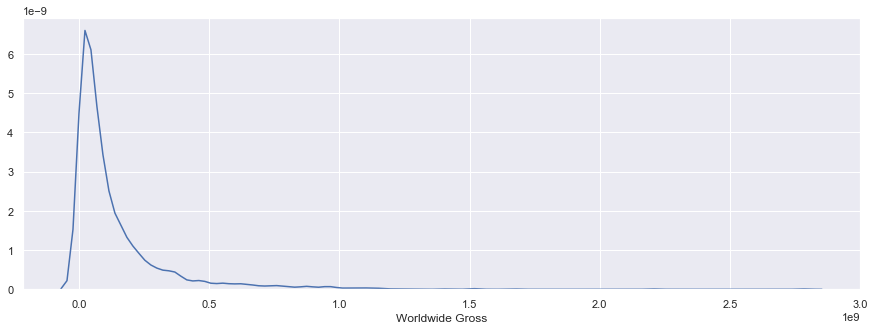

In [19]:
sns.distplot(df_movies['Worldwide Gross'],hist=False);

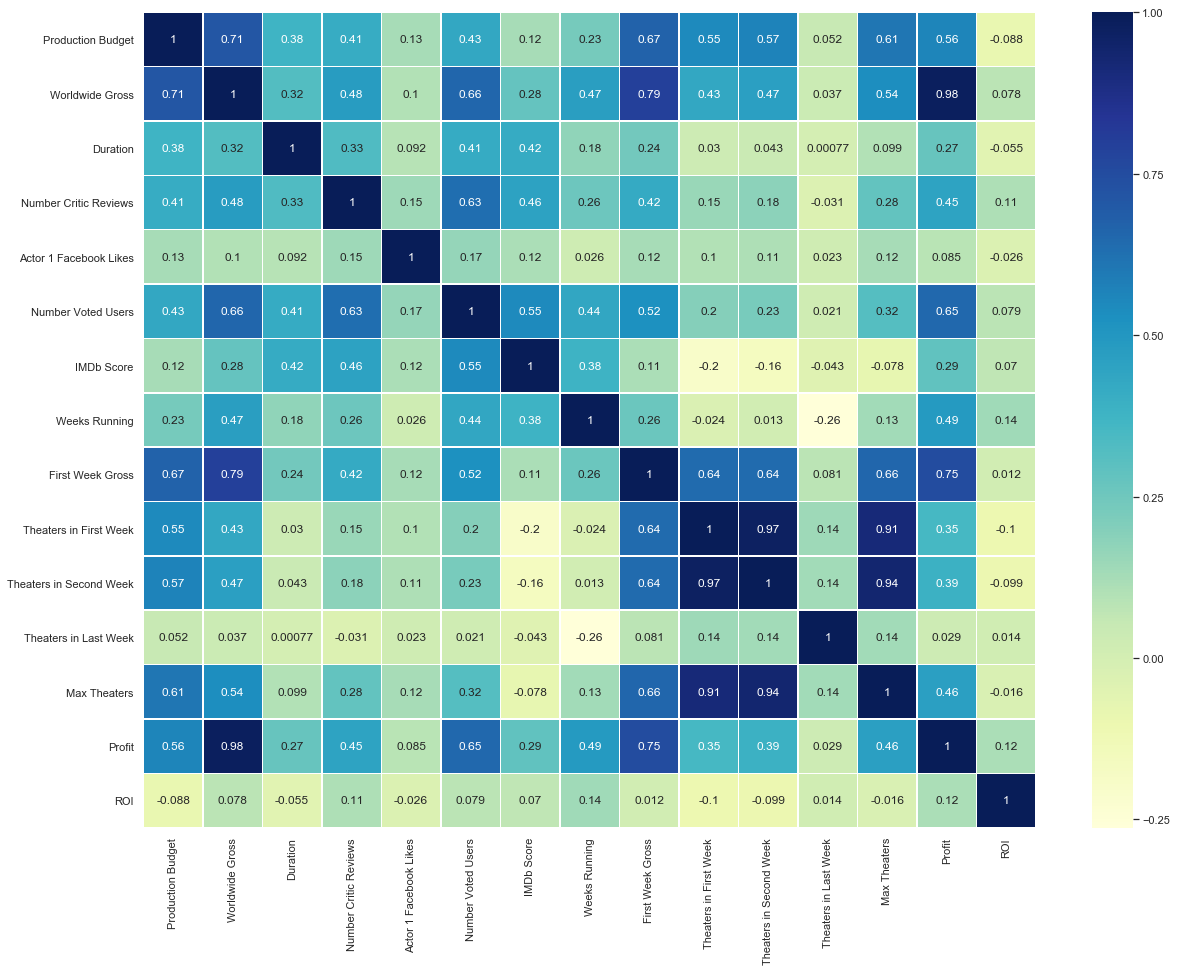

In [20]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_movies_train_reg[num_columns].corr(),ax=ax,annot=True,linewidths=.5,cmap="YlGnBu");

In [21]:
X = df_movies_train_reg[['Production Budget', 'Worldwide Gross','Duration',
       'Number Critic Reviews', 'Actor 1 Facebook Likes', 'Number Voted Users',
       'IMDb Score', 'Weeks Running','Theaters in First Week', 'Theaters in Second Week',
       'Theaters in Last Week', 'Max Theaters', 'Profit', 'ROI']]
y = df_movies_train_reg['First Week Gross']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train,sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
predictions = lm.predict(X_test)

In [26]:
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
print('Variance score: %.2f' % r2_score(y_test,predictions))

Variance score: 0.78


In [28]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,predictions))

Mean squared error: 64856610011490.70


In [29]:
X = df_movies_test_reg[['Production Budget', 'Worldwide Gross','Duration',
       'Number Critic Reviews', 'Actor 1 Facebook Likes', 'Number Voted Users',
       'IMDb Score', 'Weeks Running','Theaters in First Week', 'Theaters in Second Week',
       'Theaters in Last Week', 'Max Theaters', 'Profit', 'ROI']]
y = df_movies_test_reg['First Week Gross']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
lm2 = LinearRegression()

In [32]:
lm2.fit(X_train,y_train,sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
predictions = lm2.predict(X_test)
print('Variance score: %.2f' % r2_score(y_test,predictions))
print("Mean squared error: %.2f" % mean_squared_error(y_test,predictions))

Variance score: 0.87
Mean squared error: 175748451986918.34


# Decision Tree classification

Let us create a new feature called Long Running, assigning False for movies that run for shorter than 14 weeks and True for movies that run for 14 weeks or longer.

In [34]:
df_movies['Long Running'] = df_movies['Weeks Running']>=14

In [35]:
X = df_movies[['Production Budget','First Week Gross','Theaters in First Week','Theaters in Second Week','IMDb Score','Duration']]
y = df_movies['Long Running']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
predictions = dtree.predict(X_test,)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.68      0.65      0.67       487
        True       0.64      0.67      0.65       445

   micro avg       0.66      0.66      0.66       932
   macro avg       0.66      0.66      0.66       932
weighted avg       0.66      0.66      0.66       932



In [40]:
print(confusion_matrix(y_test,predictions))

[[318 169]
 [147 298]]


# Random forest classification

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
predictions = rfc.predict(X_test)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.74      0.74      0.74       487
        True       0.71      0.71      0.71       445

   micro avg       0.73      0.73      0.73       932
   macro avg       0.73      0.73      0.73       932
weighted avg       0.73      0.73      0.73       932



In [45]:
print(confusion_matrix(y_test,predictions))

[[359 128]
 [127 318]]
